In [24]:
import torch
import numpy as np
import matplotlib.pyplot as plt

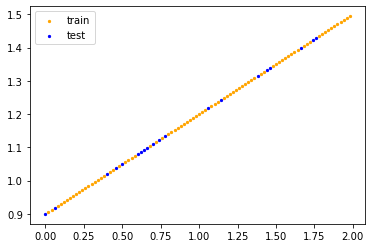

In [28]:
# create linear data
weight = 0.3
bias = 0.9

X = torch.arange(0,2,0.02).reshape(-1,1)
y = weight*X + bias

train_size = int(0.8 * len(X))
random_index = np.random.permutation(len(X))
X_train, y_train = X[random_index[:train_size]], y[random_index[:train_size]]
X_test, y_test = X[random_index[train_size:]], y[random_index[train_size:]]

plt.scatter(X_train, y_train, s=5, c='orange', label='train')
plt.scatter(X_test, y_test, s=5, c='blue', label='test')
plt.legend();

In [57]:
class LinearRegression(torch.nn.Module) :
    def __init__(self) :
        super().__init__()
        self.linear_layer = torch.nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) :
        return self.linear_layer(x)


Linear_model = LinearRegression()
print(Linear_model.state_dict())

loss_fn = torch.nn.L1Loss()
optimizer = torch.optim.SGD(params=Linear_model.parameters(), lr=0.01)

OrderedDict([('linear_layer.weight', tensor([[-0.7100]])), ('linear_layer.bias', tensor([0.1758]))])


In [58]:
# train the linear_model
epochs = 300
train_loss_ = []
test_loss_ = []
epoch_count = []

for epoch in range(epochs) :
    Linear_model.train()

    y_pred = Linear_model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()

    loss.backward()
    optimizer.step()

    Linear_model.eval()

    # predicts
    with torch.inference_mode() :
        test_pred = Linear_model(X_test)
        test_loss = loss_fn(test_pred, y_test.type(torch.float))
    
        if epoch%20 == 0 :
            epoch_count.append(epoch)
            train_loss_.append(loss.detach().numpy())
            test_loss_.append(test_loss.detach().numpy())
            print(f'epoch {epoch} | loss_train : {loss:.6f} | loss_test : {test_loss:.6f}')


epoch 0 | loss_train : 1.749392 | loss_test : 1.604102
epoch 20 | loss_train : 1.343346 | loss_test : 1.223432
epoch 40 | loss_train : 0.937301 | loss_test : 0.842762
epoch 60 | loss_train : 0.531256 | loss_test : 0.462092
epoch 80 | loss_train : 0.148297 | loss_test : 0.110678
epoch 100 | loss_train : 0.040570 | loss_test : 0.041614
epoch 120 | loss_train : 0.018785 | loss_test : 0.018702
epoch 140 | loss_train : 0.005122 | loss_test : 0.013310
epoch 160 | loss_train : 0.005122 | loss_test : 0.013310
epoch 180 | loss_train : 0.005122 | loss_test : 0.013310
epoch 200 | loss_train : 0.005122 | loss_test : 0.013310
epoch 220 | loss_train : 0.005122 | loss_test : 0.013310
epoch 240 | loss_train : 0.005122 | loss_test : 0.013310
epoch 260 | loss_train : 0.005122 | loss_test : 0.013310
epoch 280 | loss_train : 0.005122 | loss_test : 0.013310


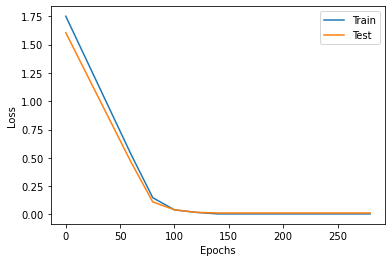

In [62]:
plt.plot(epoch_count, train_loss_, label='Train')
plt.plot(epoch_count, test_loss_, label='Test')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend();

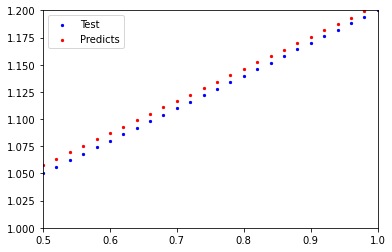

In [76]:
# prediction
Linear_model.eval()

with torch.inference_mode() :
    y_preds = Linear_model(X)

plt.scatter(X, y, s=5, color='blue', label='Test')
plt.scatter(X, y_preds, s=5, color='red', label='Predicts')
plt.axis([0.5, 1, 1, 1.2])
plt.legend();

In [75]:
print('weight and bias after training : ')
print(Linear_model.state_dict())
print(f'real weight and bias : {weight}, {bias}')

weight and bias after training : 
OrderedDict([('linear_layer.weight', tensor([[0.2951]])), ('linear_layer.bias', tensor([0.9101]))])
real weight and bias : 0.3, 0.9


In [78]:
# save the model
from pathlib import Path

MODEL_PATH = Path('save_model')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = '0.1_pytorch_wf_ex_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f'save model to : {MODEL_SAVE_PATH}')
torch.save(Linear_model.state_dict(), f=MODEL_SAVE_PATH)

save model to : save_model\0.1_pytorch_wf_ex_model_0.pth


In [79]:
# load the saved model
loaded_model = LinearRegression()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH)) 
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2951]])),
             ('linear_layer.bias', tensor([0.9101]))])